Exercise 1.6 from Cracking the Coding Interview:

Implement a method to perform basic string compression using the counts of repeated characters. For example, the string aabcccccaaa would become a2blc5a3. If the "compressed" string would not become smaller than the original string, your method should return the original string. You can assume the string has only uppercase and lowercase letters (a - z).

We will solve this in two ways encapsulated in our functions compress1 and compress2

In [1]:
# Note that the underlying assumption in the code for this function is that 
# if there are consecutive repeated characters in the string, then 
# the compressed string is going to be smaller than the original string. 
# This assumption fails for e.g. when the original string is 'aab', 
# the compressed string will then be 'a2b1' 
# which is actually longer than the original string and 
# hence not a compression of the original string. 
def compress1(s):
    compressed_string = ''
    current_char = s[0]
    count = 1
    compressed = False
    for idx in range(1, len(s)):
        if s[idx] == current_char:
            count+=1
            compressed = True
        else:
            compressed_string+= current_char + str(count)
            current_char = s[idx]
            count = 1
     
    compressed_string+= current_char + str(count)
    if compressed:
        return compressed_string
    return s


Note that the underlying assumption in the above function is that if there are consecutive repeated characters in the string, then the compressed string is going to be smaller than the original string. 
This <font color = red> assumption fails </font> for e.g. when the original string is 'aab', the compressed string will then be 'a2b1' which is actually longer than the original string and hence not a compression of the original string. Therefore the correct way to check is to simply compare the lengths of the compressed string and the original string and return the smaller string. 

In [3]:
# this function only returns the compressed string if its length is smaller than the original string
# hence ensuring that it always returns the smaller string
def compress2(s):
    compressed_string = ''
    current_char = s[0]
    count = 1
    for idx in range(1, len(s)):
        if s[idx] == current_char:
            count+=1
        else:
            compressed_string+=current_char + str(count)
            current_char = s[idx]
            count = 1
     
    compressed_string+=current_char + str(count)
    if len(compressed_string) <  len(s):
        return compressed_string
    return s

Note that in both the methods above, we were building the compressed string during the iterations itself. This involves repeated copying the compressed string to itself (when we do: compressed_string += current_char + str(count) ). In stead of doing this, what can be done is to throw current_char + str(count) into a list. Once the code finishes, can then build the compressed string by using .join() method of the string class. The corresponding code is as follows:

In [2]:
# this function only returns the compressed string if its length is smaller than the original string
# hence ensuring that it always returns the smaller string
def compress3(s):
    compressed_objects = []
    current_char = s[0]
    count = 1
    for idx in range(1, len(s)):
        if s[idx] == current_char:
            count+=1
        else:
            compressed_objects.append(current_char + str(count))
            current_char = s[idx]
            count = 1
     
    compressed_objects.append(current_char + str(count))
    compressed_string = ''.join(compressed_objects)
    if len(compressed_string) <  len(s):
        return compressed_string
    return s

In [4]:
s = input('input a string to compress: ')
print('compressed string from method 1: {}'.format(compress1(s)))
print('compressed string from method 2: {}'.format(compress2(s)))
print('compressed string from method 3: {}'.format(compress3(s)))

input a string to compress: aaabbeeddrrrrttt
compressed string from method 1: a3b2e2d2r4t3
compressed string from method 2: a3b2e2d2r4t3
compressed string from method 3: a3b2e2d2r4t3


Let's time compress2 and compress3 and see which is faster.

In [27]:
import numpy as np
import string
import time
import matplotlib.pyplot as plt

In [10]:
# function to return a random string of given length
# the set of letter is already available through string constants. See the following link
# https://docs.python.org/2/library/string.html#string-constants
letters = list(string.ascii_letters)
def random_string(size):
    random = ''.join(np.random.choice(letters, size))
    return random

In [36]:
largest_size = 10000
repetitions_per_size = 100
time_list2 = []
time_list3 = []
for size in range(1,largest_size+1):
    # for a given size we will repeat repetition_per_size times to get 
    # an estimage of the average timing for that size
    timing2 = []
    timing3 = []
    for _ in range(repetitions_per_size):
        original = random_string(size)
        start2 = time.time()
        compressed_str2 = compress2(original)
        end2 = time.time()
        timing2.append(end2-start2)
        start3 = time.time()
        compressed_str3 = compress3(original)
        end3 = time.time()
        timing3.append(end3-start3)
        if compressed_str2!=compressed_str3:
            print('Error: The compressed string returned by the two methods are not same')
            print('The original string was: {}'.format(original))
            print('compress2 returned: {}'.format(compressed_str2))
            print('compress3 returned: {}'.format(compressed_str3))
    time_list2.append(np.mean(timing2))
    time_list3.append(np.mean(timing3))
    

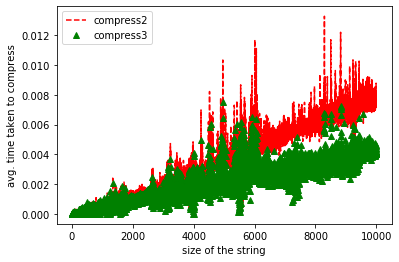

In [37]:
plt.plot(time_list2,'r--', label = 'compress2')
plt.plot(time_list3, 'g^', label = 'compress3')
plt.xlabel('size of the string')
plt.ylabel('avg. time taken to compress')
plt.legend()
plt.show()

**Clearly, for large strings, using ''.join() to create the compressed_string just once is much faster then repeatedly creating a new compressed_string from the old one by concatenating new pieces to it.**